Importing required packages and modules

In [39]:
import numpy as np                   
import matplotlib.pyplot as plt      
import random                        
from keras.datasets import mnist     
from keras.models import Sequential  
from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils 

time: 2.15 ms (started: 2022-06-02 13:59:37 +00:00)


Importing dataset

In [40]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
time: 354 ms (started: 2022-06-02 13:59:52 +00:00)


Displaying data

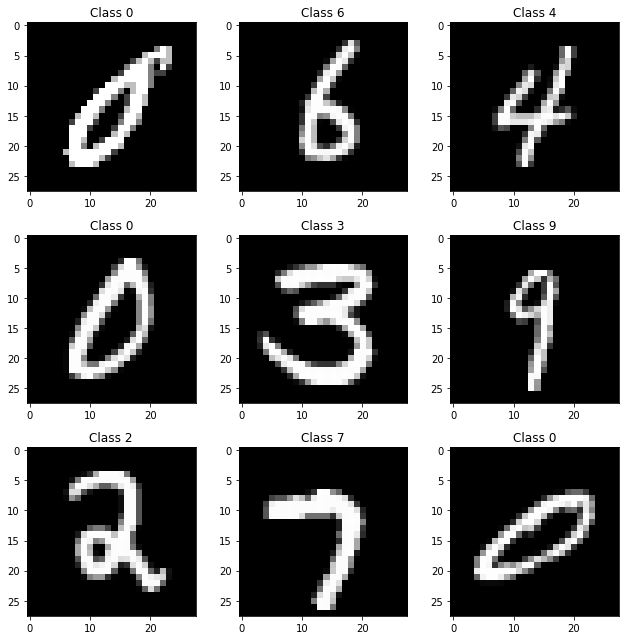

time: 1.58 s (started: 2022-06-02 13:59:52 +00:00)


In [41]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [42]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    7   10   87  104  104   58    0  0  0  0  0  


Transforming data

In [43]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')
X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)
time: 75.9 ms (started: 2022-06-02 13:59:54 +00:00)


Normalizing data

In [44]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

time: 9.44 ms (started: 2022-06-02 13:59:54 +00:00)


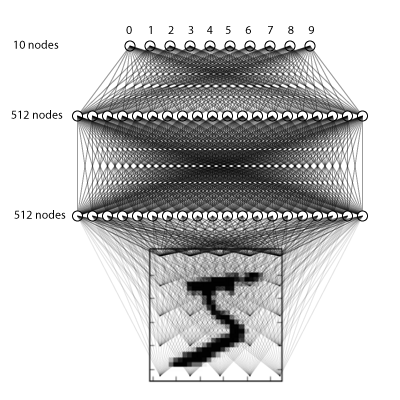

Simple model 

In [45]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.26 s (started: 2022-06-02 13:59:54 +00:00)


In [47]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

time: 19.7 ms (started: 2022-06-02 14:01:11 +00:00)


**SIMPLE CNN MODEL** (USED FOR BENCHMARK)

In [51]:
model.fit(X_train, Y_train,batch_size=128, epochs=25,verbose=1)

Epoch 1/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0479 - accuracy: 0.9838
Epoch 2/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0353 - accuracy: 0.9885
Epoch 3/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0264 - accuracy: 0.9911
Epoch 4/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0259 - accuracy: 0.9916
Epoch 5/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0210 - accuracy: 0.9932
Epoch 6/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0234 - accuracy: 0.9921
Epoch 7/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0220 - accuracy: 0.9930
Epoch 8/25
469/469 [==============================] - 8s 16ms/step - loss: 0.0182 - accuracy: 0.9940
Epoch 9/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 10/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0176 - accura

time: 3min 16s (started: 2022-06-02 14:03:44 +00:00)


In [52]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0853 - accuracy: 0.9847
Test score: 0.0853327140212059
Test accuracy: 0.9847000241279602
time: 1.31 s (started: 2022-06-02 14:07:29 +00:00)
